# Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

# Importing data

In [2]:
df=pd.read_csv("Crop_recommendation.csv")

### top 5 rows of the dataset

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### last 5 rows of the data

In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


### Some info of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Finding null values

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Data Preprocessing

In [8]:
df.rename(columns={"N":"Nitrogen(N)","P":"Phosphorus(P)","K":"Potassium(K)","ph":"Ph value"},inplace=True)

In [9]:
df.head()

,Nitrogen(N),Phosphorus(P),Potassium(K),temperature,humidity,Ph value,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


##### this is a clean data set so we can not so much preprocess

# Exploratory Data Analysis (EDA)

## 1.What are the features and data types in the dataset?

In [10]:
df.columns

Index(['Nitrogen(N)', 'Phosphorus(P)', 'Potassium(K)', 'temperature',
       'humidity', 'Ph value', 'rainfall', 'label'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nitrogen(N)    2200 non-null   int64  
 1   Phosphorus(P)  2200 non-null   int64  
 2   Potassium(K)   2200 non-null   int64  
 3   temperature    2200 non-null   float64
 4   humidity       2200 non-null   float64
 5   Ph value       2200 non-null   float64
 6   rainfall       2200 non-null   float64
 7   label          2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
df.describe()

,Nitrogen(N),Phosphorus(P),Potassium(K),temperature,humidity,Ph value,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## 2.What is the distribution of each numeric feature (e.g., N, P, K, temperature, humidity, pH, rainfall)?

In [13]:
df.head(3)

,Nitrogen(N),Phosphorus(P),Potassium(K),temperature,humidity,Ph value,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [14]:
numaric_columns=df.drop("label",axis=1)

In [15]:
numaric_columns.head()

,Nitrogen(N),Phosphorus(P),Potassium(K),temperature,humidity,Ph value,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

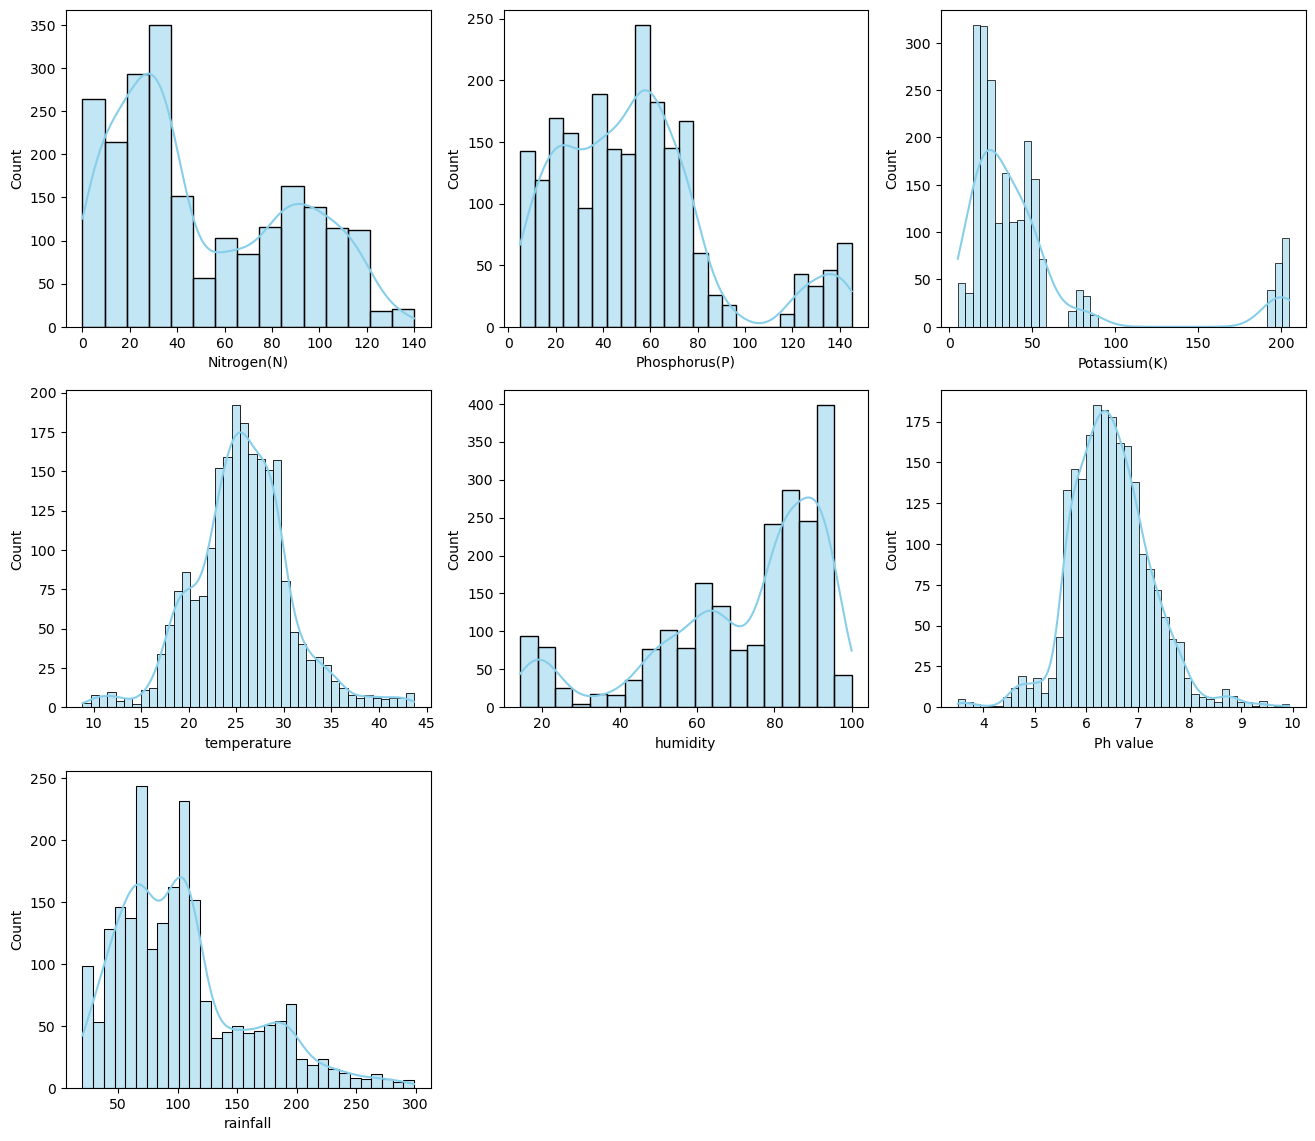

In [16]:
plt.figure(figsize=(16,14))
for i,column in enumerate(numaric_columns):
    plt.subplot(3,3,i+1)
    sns.histplot(df[column],color="skyblue",kde=True)
plt.show()

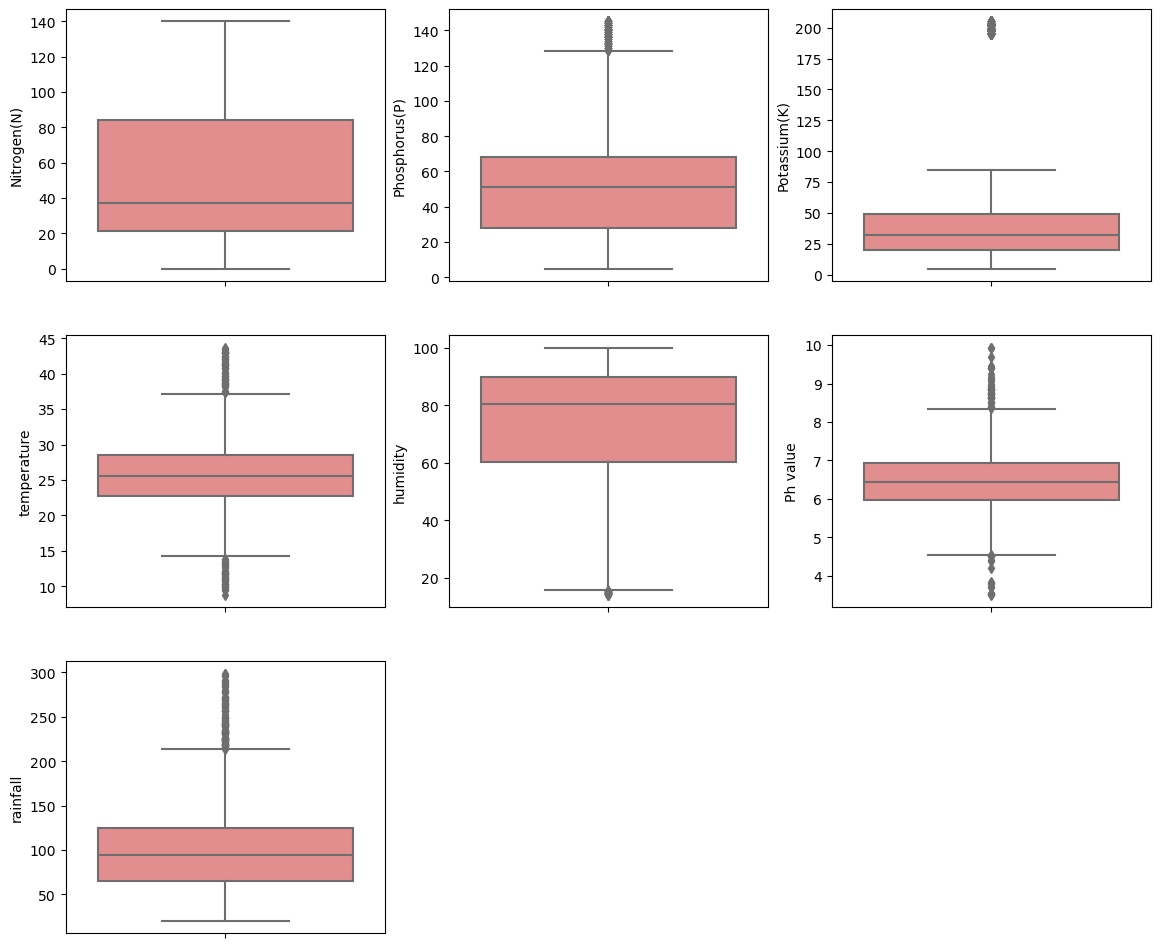

In [17]:
plt.figure(figsize=(14,12))
for i,columns in enumerate(numaric_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=columns,color="lightcoral",data=df)
plt.show()

# What is the class distribution of the label (i.e., recommended crops)?

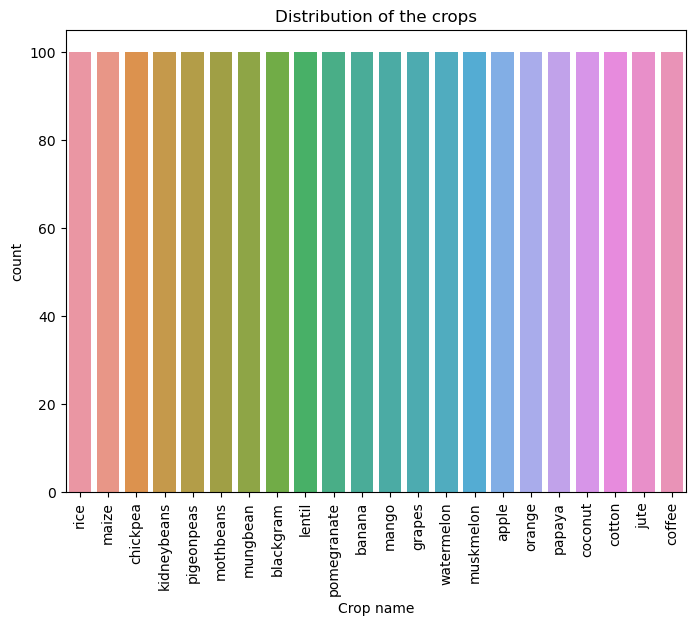

In [86]:
plt.figure(figsize=(8,6))
sns.countplot(x=df["label"])
plt.title("Distribution of the crops")
plt.xlabel("Crop name")
plt.xticks(rotation=90)
plt.show()

# Are there any strong correlations between numerical features?

In [87]:
df.head(2)

,Nitrogen(N),Phosphorus(P),Potassium(K),temperature,humidity,Ph value,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


In [19]:
numerical_columns=df.drop("label",axis=1)

In [20]:
correlation=numerical_columns.corr()

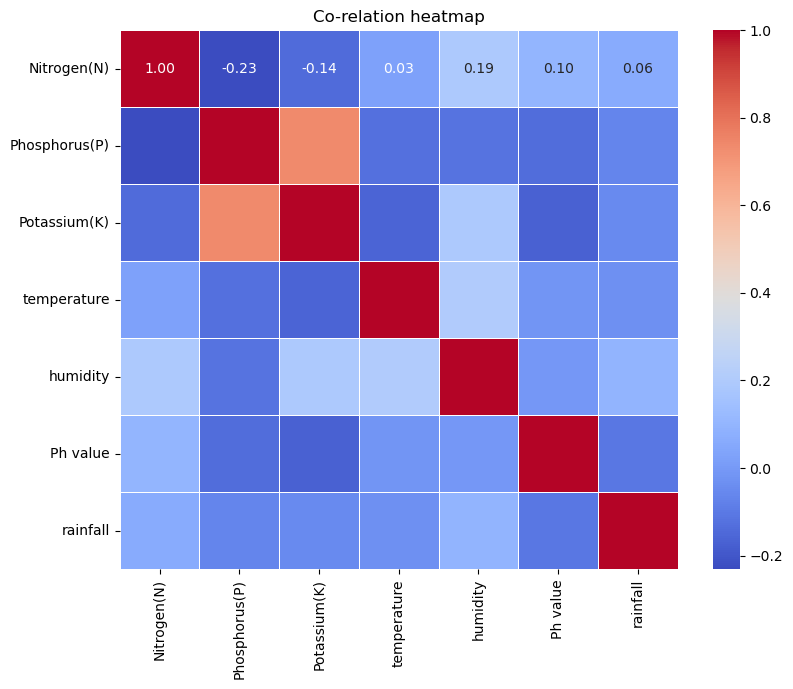

In [22]:
plt.figure(figsize=(9,7))
sns.heatmap(correlation,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Co-relation heatmap")
plt.show()

# How do key features (e.g., temperature, pH, rainfall) vary across different crop labels?

In [41]:
df.head(2)

,Nitrogen(N),Phosphorus(P),Potassium(K),temperature,humidity,Ph value,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


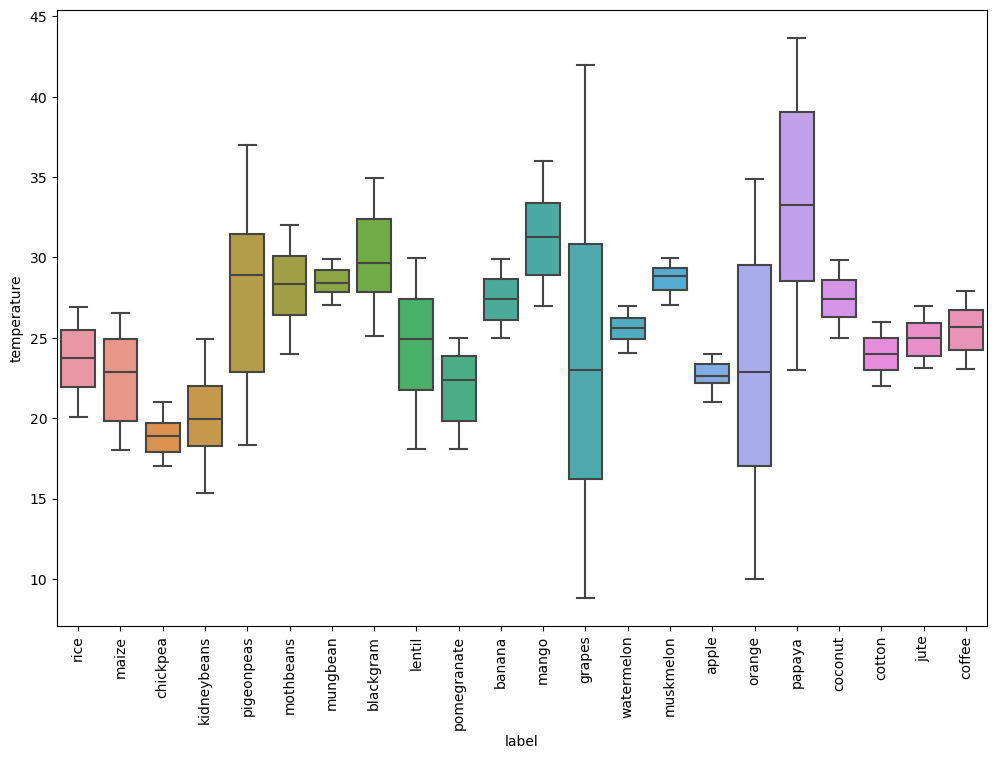

In [40]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="label",y="temperature")
plt.xticks(rotation=90)
plt.show()

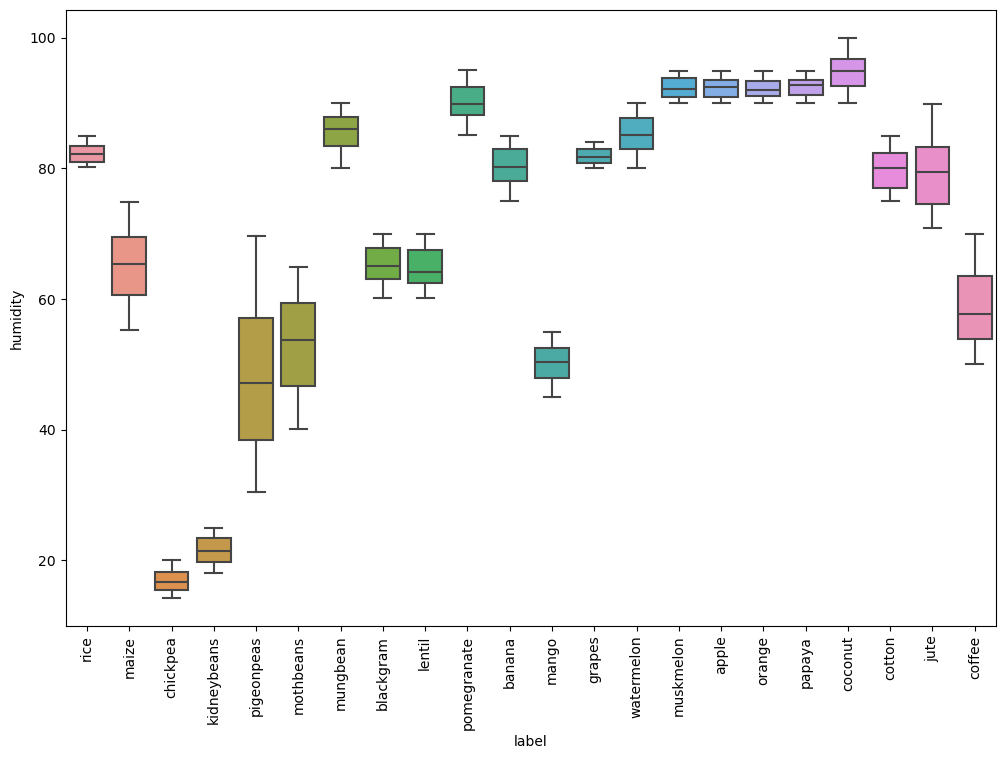

In [42]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="label",y="humidity")
plt.xticks(rotation=90)
plt.show()

In [50]:
data=df[["temperature","humidity","Ph value","rainfall"]]

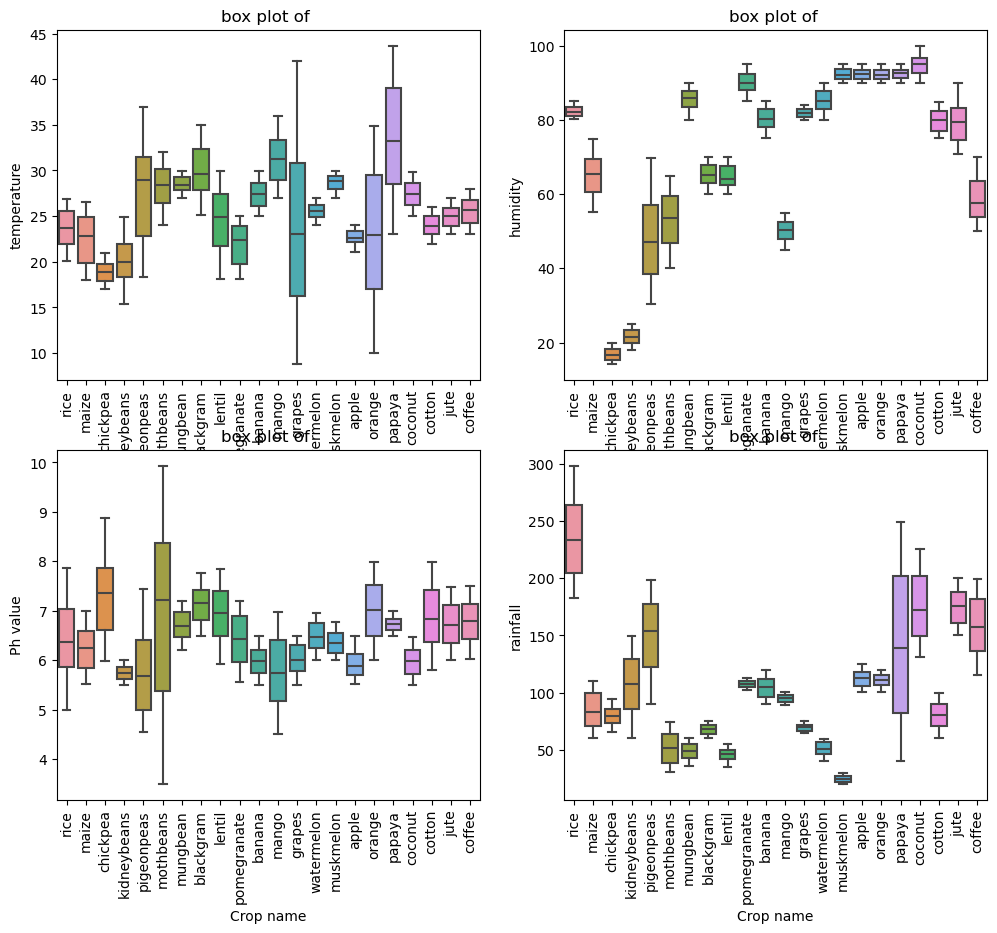

In [83]:
plt.figure(figsize=(12,10))
for i,columns in enumerate(data.columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,x="label",y=columns)
    plt.title("box plot of ")
    plt.xticks(rotation=90)
    plt.xlabel("Crop name")
plt.show()

# What are the average and variance of nutrients (N, P, K) for each crop?

In [71]:
df.head(2)

,Nitrogen(N),Phosphorus(P),Potassium(K),temperature,humidity,Ph value,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


In [74]:
avg=df.groupby("label")[["Nitrogen(N)","Phosphorus(P)","Potassium(K)"]].mean().reset_index(False)

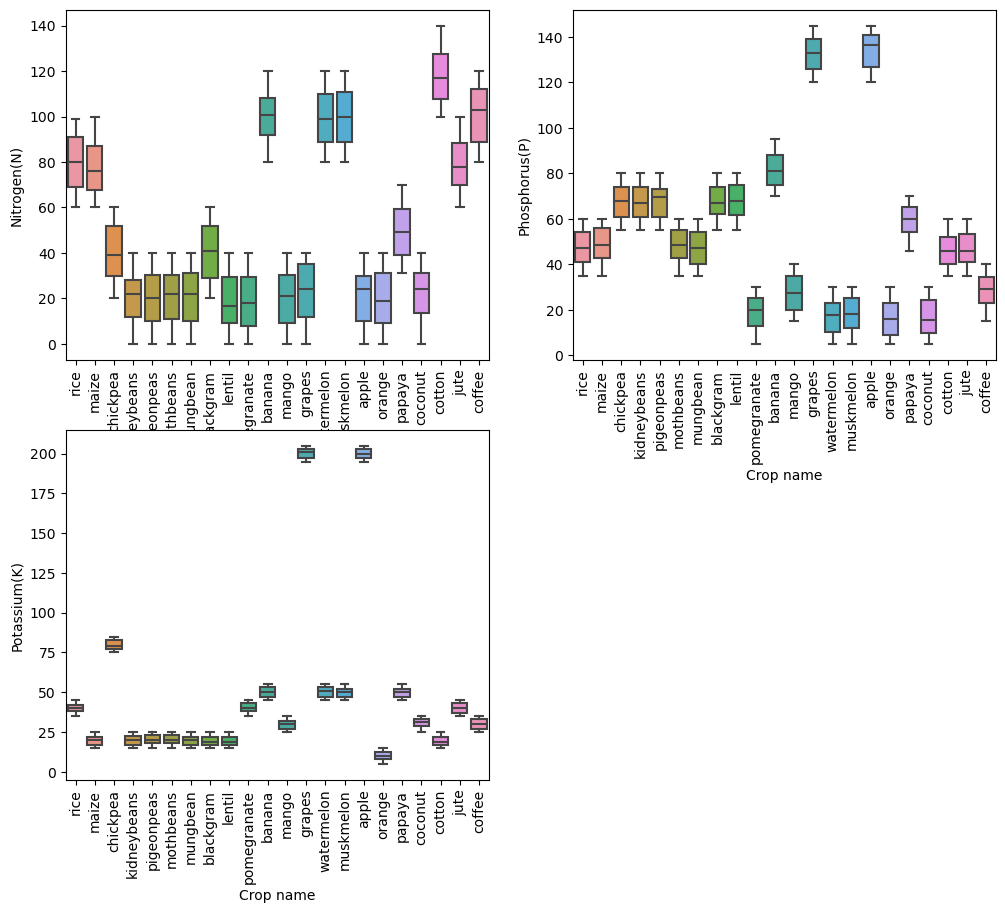

In [82]:
plt.figure(figsize=(12,10))
for i,columns in enumerate(["Nitrogen(N)","Phosphorus(P)","Potassium(K)"]):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,x="label",y=columns)
    plt.xticks(rotation=90)
    plt.xlabel("Crop name")
plt.show()

# Which crops are recommended under extreme conditions (e.g., high pH, low rainfall)?

In [88]:
df.head(2)

,Nitrogen(N),Phosphorus(P),Potassium(K),temperature,humidity,Ph value,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


In [93]:
df.describe()

,Nitrogen(N),Phosphorus(P),Potassium(K),temperature,humidity,Ph value,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### crops are recommended under extreme conditions of high pH, low temperature,humidity,rainfall

In [126]:
high_ph=df[(df["temperature"]<=22.769375) & (df["humidity"]<=60.261953) &(df["rainfall"]<=64.551686) & (df["Ph value"]>=6.923643)]
high_temperature=df[(df["temperature"]>=28.561654) & (df["humidity"]<=60.261953) &(df["rainfall"]<=64.551686) & (df["Ph value"]<=5.971693)]
high_humidity=df[(df["temperature"]<=22.769375) & (df["humidity"]>=89.948771) &(df["rainfall"]<=64.551686) & (df["Ph value"]<=5.971693)]
high_rainfall=df[(df["temperature"]<=22.769375) & (df["humidity"]<=60.261953) &(df["rainfall"]>=124.267508) & (df["Ph value"]<=5.971693)]


In [148]:
high_ph["label"].value_counts()

label
maize    1
Name: count, dtype: int64

In [149]:
high_temperature["label"].value_counts()

label
mothbeans    11
Name: count, dtype: int64

In [152]:
high_humidity["label"].value_counts()

Series([], Name: count, dtype: int64)

In [155]:
high_rainfall["label"].value_counts()

label
kidneybeans    26
pigeonpeas     12
Name: count, dtype: int64

In [131]:
crop_recomendation=pd.concat([high_ph,high_rainfall,high_humidity,high_temperature])

In [132]:
crop_recomendation["label"].value_counts()

label
kidneybeans    26
pigeonpeas     12
mothbeans      11
maize           1
Name: count, dtype: int64

There is No Crop available at this conditions Empty DataFrame
Columns: [Nitrogen(N), Phosphorus(P), Potassium(K), temperature, humidity, Ph value, rainfall, label]
Index: []



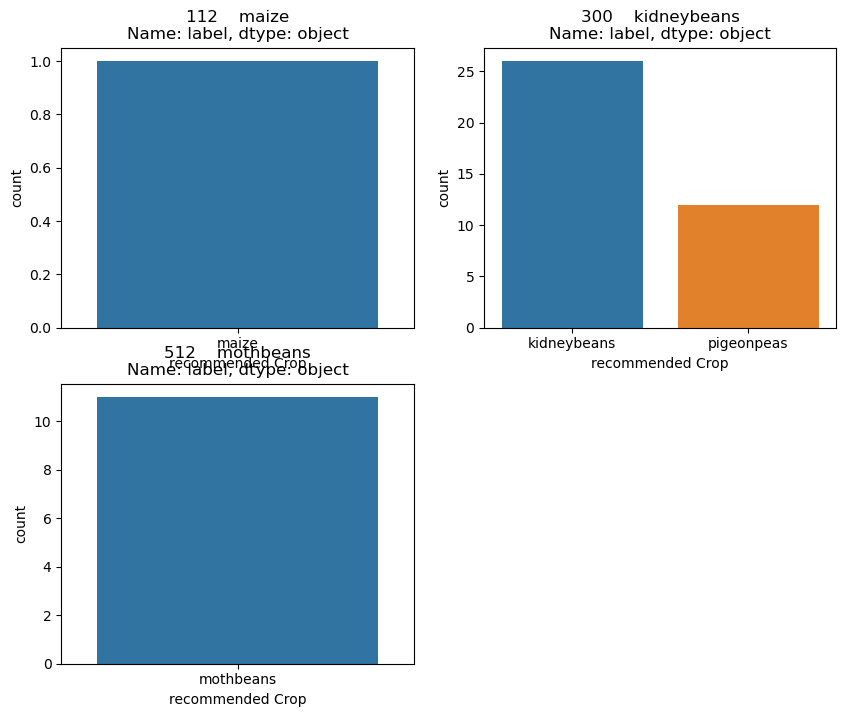

In [156]:
plt.figure(figsize=(10,8))
for i,data in enumerate([high_ph,high_rainfall,high_temperature,high_humidity]):
    if data.empty:
        print("There is No Crop available at this conditions",data)
        print("")
    else:
        plt.subplot(2,2,i+1)
        sns.countplot(x=data["label"],data=data)
        plt.title(data["label"].head(1))
        plt.xlabel("recommended Crop")

### splitting data into feautures and target 

In [161]:
x=df.drop("label",axis=1)
y=df["label"]

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model building

In [227]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [238]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

# Accuracy score on train data

In [242]:
x_pred=model.predict(x_train)
print("Accuracy on train data: ",accuracy_score(x_pred,y_train))

Accuracy on train data:  1.0


## classification_report on train data

In [243]:
print(classification_report(x_pred,y_train))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        77
      banana       1.00      1.00      1.00        79
   blackgram       1.00      1.00      1.00        80
    chickpea       1.00      1.00      1.00        74
     coconut       1.00      1.00      1.00        73
      coffee       1.00      1.00      1.00        83
      cotton       1.00      1.00      1.00        83
      grapes       1.00      1.00      1.00        86
        jute       1.00      1.00      1.00        77
 kidneybeans       1.00      1.00      1.00        80
      lentil       1.00      1.00      1.00        89
       maize       1.00      1.00      1.00        79
       mango       1.00      1.00      1.00        81
   mothbeans       1.00      1.00      1.00        76
    mungbean       1.00      1.00      1.00        81
   muskmelon       1.00      1.00      1.00        83
      orange       1.00      1.00      1.00        86
      papaya       1.00    

### confusion_matrix

In [245]:
print(confusion_matrix(x_pred,y_train))

[[77  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 79  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 74  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 73  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 83  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 83  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 86  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 77  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 89  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 79  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 81  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 76  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

# Accuracy score data on test data

In [251]:
y_pred=model.predict(x_test)
print("Accuracy on test data: ",accuracy_score(y_pred,y_test))

Accuracy on test data:  0.9931818181818182


## confusion_matrixon test data

In [252]:
print(confusion_matrix(y_pred,y_test))

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

## classification_report on test data

In [254]:
print("classification_report on test data",classification_report(y_pred,y_test))

classification_report on test data               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.92      0.96        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.92      0.96        12
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.96      1.00      0.98        23
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00   

# Prediction

In [257]:
model.predict(x_test)

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickp

### while passing input data

In [262]:
input_data=[[17,16,14,16.396243,92.181519,6.625539,102.944161]]

In [263]:
model.predict(input_data)[0]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'orange'

#### Another way to pass input data

In [264]:
input_data=df[df.index==100]

In [265]:
input_data

,Nitrogen(N),Phosphorus(P),Potassium(K),temperature,humidity,Ph value,rainfall,label
100,71,54,16,22.6136,63.690706,5.749914,87.759539,maize


In [267]:
input_data_without_label=input_data.drop("label",axis=1)
input_data_without_label

,Nitrogen(N),Phosphorus(P),Potassium(K),temperature,humidity,Ph value,rainfall
100,71,54,16,22.6136,63.690706,5.749914,87.759539


In [269]:
model.predict(input_data_without_label)[0]

'maize'

### you can check the predicted label and original label

### you can pass input like this alos

In [271]:
input_data=pd.DataFrame([[71,54,16,22.6136,63.690706,5.749914,87.759539]],
                        columns=["Nitrogen(N)","Phosphorus(P)","Potassium(K)","temperature","humidity","Ph value","rainfall"])

In [272]:
input_data

,Nitrogen(N),Phosphorus(P),Potassium(K),temperature,humidity,Ph value,rainfall
0,71,54,16,22.6136,63.690706,5.749914,87.759539


In [274]:
model.predict(input_data)[0]

'maize'

In [275]:
import pickle

In [278]:
pickle.dump(model,open("Crop_recommendation.pkl","wb"))

In [279]:
z=pickle.load("Crop_recommendation.pkl","rb")

TypeError: load() takes exactly 1 positional argument (2 given)